In [8]:
#gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [9]:
df = pd.read_csv("dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Gereksiz sütunları kaldır (değişkenlik göstermeyenler)
low_variance_cols = df.nunique()[df.nunique() == 1].index.tolist()
df.drop(columns=low_variance_cols, inplace=True)


In [10]:
# Etiket sütununu çıkar (gözetimsiz öğrenme için)
X_unsupervised = df.drop("Diabetes_binary", axis=1)

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

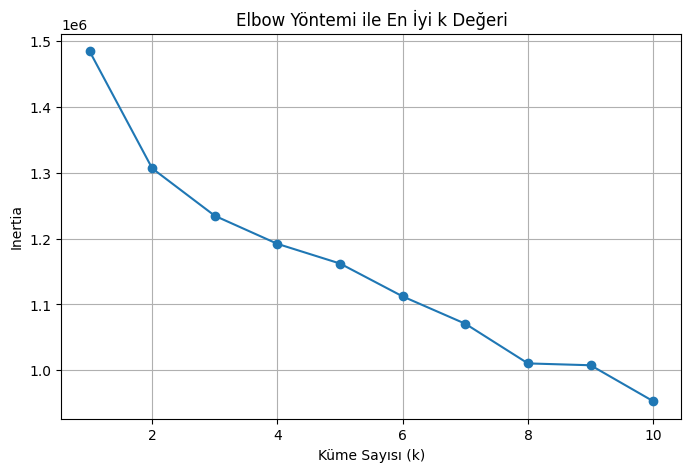

In [11]:
# Elbow Yöntemi ile en uygun k değeri bulma
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Yöntemi ile En İyi k Değeri")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [13]:
# En iyi k seçimi
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

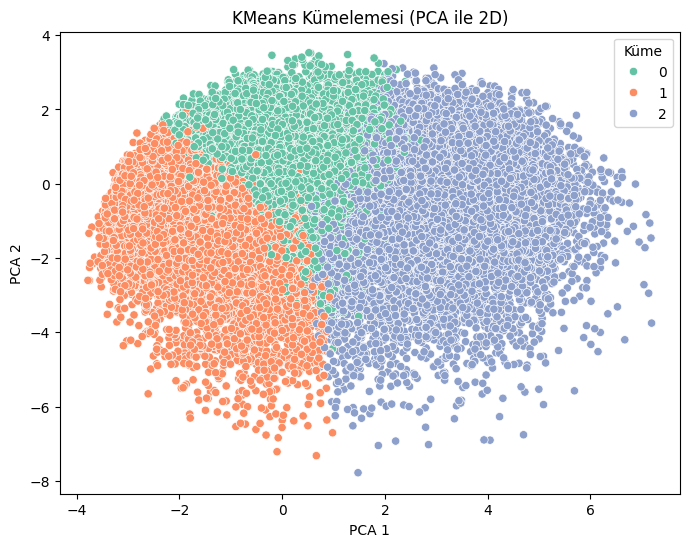

In [14]:
# PCA ile 2 boyutlu görselleştirme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set2")
plt.title("KMeans Kümelemesi (PCA ile 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Küme")
plt.show()

In [15]:
# Küme özetleri
cluster_summary = df.groupby("Cluster").mean()
print("\nKüme Özetleri:\n", cluster_summary)


Küme Özetleri:
          Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
Cluster                                                                        
0               0.630022  0.866128  0.694304   0.995213  30.313328  0.520572   
1               0.190564  0.090653  0.228684   0.946334  27.229778  0.342499   
2               0.756687  0.771321  0.694460   0.985427  33.184160  0.604009   

           Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Cluster                                                          ...   
0        0.046971              0.166065      0.728023  0.611323  ...   
1        0.007499              0.013006      0.854939  0.665313  ...   
2        0.175183              0.327676      0.419603  0.528377  ...   

         AnyHealthcare  NoDocbcCost   GenHlth   MentHlth   PhysHlth  DiffWalk  \
Cluster                                                                         
0             0.977763     0.037744  2.792375   1.384132   

In [16]:
# Küme başına diyabet oranları
print("\nKüme Başına Diyabet Oranları:\n")
print(pd.crosstab(df['Cluster'], df['Diabetes_binary'], normalize='index'))



Küme Başına Diyabet Oranları:

Diabetes_binary       0.0       1.0
Cluster                            
0                0.369978  0.630022
1                0.809436  0.190564
2                0.243313  0.756687
